In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
dataFile = '/Users/zhengj10/Desktop/summary/Summary_pos_to_neg_VC_p_val_10-50.pkl'
# dataFile = '/Users/zhengj10/Desktop/GENIE/Manuscript/Voltron 2 paper/Voltron 2 paper_v10/Plot_Voltron_single_mutants.pkl'
# dataFile = '/Users/zhengj10/Desktop/GENIE/Data/PatcherBot/summary/Summary_VC_all.pkl'
# dataFile = '/Volumes/genie/Jihong_GENIE_stuff/Voltron 2 with_pos_to_neg_V_steps/Summary_pos_to_neg_VC_500_lowest_p_val.pkl'
# dataFile = '/Users/zhengj10/Desktop/GENIE/Manuscript/Voltron 2 paper/Voltron 2 paper_v10/summary_plot_Voltron 2_pos_to_neg_latest.pkl'

In [108]:
df = pd.read_pickle(dataFile)
df.shape

(357, 30)

In [109]:
df.Mutation.unique()
# df.Date.unique()

array(['421.4925', '421.6138', '421.5619', '558.2', '421.1', '421.2096',
       '476.4495', '476.1', '487.1', '421.3012', '487.6', '421.3028',
       '421.2336', '421.2203', '421.3067', '421.5649', '557.1', '557.2',
       '558.1', '421.4909', '421.5657', '421.5616', '421.6051',
       '421.5951', '421.4919', '421.4892', '421.5658', '421.6052',
       '421.4876', '421.5650', '421.6155', '421.5952', '421.4911',
       '421.5152', '421.5387', '421.5414', '421.5448', '421.5617',
       '421.5751', '421.1069', '421.1076', '421.3054', '421.3167',
       '421.4850', '421.4875', '421.4882', '421.4910', '421.5760',
       '421.6053', '421.5462', '421.5659', '421.6004', '421.6038'],
      dtype=object)

In [110]:
threshold = {'leak':-300, 'Ra':50}
df_p = df[(df.Leak_min>threshold['leak'])&(df.Ra_max<threshold['Ra'])]
df_p.shape

(319, 30)

In [111]:
labels_dict = {
    # Voltron and Voltron 2
    '421.1':'Voltron',
    '421.2096':'Voltron 2',
    '476.4495': 'Voltron 2-ST',
    
    # Voltron Combo mutants
    '421.4909':'Voltron N69E R78H A122D V196P',
    '421.4919':'Voltron R78H A122D V196P',
    '421.4876':'Voltron N69E A122D',
    '421.4892':'Voltron N69E V196P',
    '421.6051':'Voltron R78H L89C A122D V196P',
    '421.5649':'Voltron Y63L N69E L89C A122D',
    '421.6052':'Voltron Y63L L89C A122D V196P',
    '421.5658':'Voltron Y63L L89C A122D',
    '421.4951':'Voltron Y63L V74W L89T',
    '421.5657':'Voltron R78H L89C A122D',
    '421.5659':'Voltron L89C A122D',
    '421.5650':'Voltron N69E L89C A122D',
    '421.5657':'Voltron R78H L89C A122D',
    '421.5616':'Voltron V74E L89C',
    '421.5619':'Voltron Y63L L89C',
    '421.5658':'Voltron Y63L L89C A122D',
    '421.5649':'Voltron Y63L N69E L89C A122D',
    '421.5462':'Voltron N69E R78H N81S L89C A122D',
    '421.5951':'Voltron R78H N81S L89C A122D',
    '421.6051':'Voltron R78H L89C A122D V196P',
    '421.5922':'Voltron Y63L A122D V196P',
    '421.6052':'Voltron Y63L L89C A122D V196P',
    '421.6004':'Voltron Y63L N69E N81S',
    '421.6155':'Voltron Y63L L89T A122D V196P',
    '421.5952':'Voltron Y63L N81S L89C A122D',
    '421.5444':'Voltron Y63L R78H A122D V196P',
    '421.5953':'Voltron V74W R78H N81S L89C A122D',
    '421.6232':'Voltron Y63L V74E N81S',
    '421.5076':'Voltron Y63L N69E R78H N81S L89C',
    '421.5740':'Voltron V74E R78H N81S V196P',
    '421.4911':'Voltron N69E A122D V196P',
    '421.5152':'Voltron N69E V74W R78H N81S L89C A122H V196P',
    '421.5387':'Voltron V74E R78H L89C V196P',
    '421.5414':'Voltron V74W R78H L89C A122H V196P',
    '421.5448':'Voltron R78H A122H V196P',
    '421.5617':'Voltron Y63L R78H L89C',
    '421.5751':'Voltron N69E R78H N81S A122D V196P',
    '421.4850':'Voltron N69E R78H',
    '421.4875':'Voltron Y63L N69E R78H A122D',
    '421.4882':'Voltron R78H A122D',
    '421.4910':'Voltron Y63L N69E A122D V196P',
    '421.5760':'Voltron R78H N81S A122D V196P',
    '421.6053':'Voltron L89C A122D V196P',
    '421.6038':'Voltron Y63L N69E R78H L89C A122D V196P',
    '421.4925':'Voltron N69E R78H A122H V196P',
    '421.6138':'Voltron N69E R78H A122D',
    
    # Voltron Single mutants
    '421.2907':'Voltron (A122X)',
    '421.2335':'Voltron (Y63P)',
    '421.2336':'Voltron (Y63T)',
    '421.2346':'Voltron (Y63I)',
    '421.3002':'Voltron (V74D)',
    '421.3046':'Voltron (V74S)',
    '421.3028':'Voltron (V74W)',
    '421.303':'Voltron (Y146X)',
    '421.3012':'Voltron (V74G)',
    '421.2379':'Voltron (Y63K)',
    '421.2347':'Voltron (Y63D)',
    '421.3067':'Voltron (V74H)',
    '421.2203':'Voltron (R78N)',
    '421.3006':'Voltron (V74P)',
    '421.1069':'Voltron (N69E)',
    '421.1076':'Voltron (N69P)',
    '421.3054':'Voltron (N74E)',
    '421.3167':'Voltron (L89T)',

    # ASAP1 variants
    '376.1':'ASAP1',
    '376.13':'ASAP1 (T392V)',
    
    # ASAP3b variants
    '414.1':'GS-ASAP3b',
    '376.20950':'ASAP3b (T392V)',
    '376.20949':'ASAP3b (T392Y)',
    '485.20950':'ASAP3b (T392V)-ST',
    '376.20948':'ASAP3b',
    '485.20949':'ASAP3b (T392Y)-ST',
    '485.6':'ASAP3b-ST',
    '376.17995':'ASAP3b N391L T392I',
    '376.18153':'ASAP3b N391I T392V',
    '533.1':'ASAP3b-Kv',
    
    # Amy's Feb batch of ASAP3b variants
    'ASAP3b.T392V.H':'pCAG0–ASAP3b (T392V)-NL-SOM2 (Lin)',
    'ASAP3b.T392V.G':'pCAG0–ASAP3b (T392V)-lTlcnC',
    'ASAP3b.T392V.F':'pCAG0–ASAP3b (T392V)-NL-SOM2 (GENIE)',
    'ASAP3b.T392V.I':'pCAG0–ASAP3b (T392V)-GSS3-SOM2-lTlcnC',
    'ASAP3b.T392V.J':'376.2095 / pCAG-ASAP3b (T392V)',
    'ASAP3b.T392V.C':'pCAG0–ASAP3b (T392V)-GSSlong-SOM2 (GENIE)',
    'ASAP3b.T392V.B':'pCAG0–ASAP3b (T392V)-KGC-GSS3-ER2-GSS3-SOM2 (GENIE)',
    'ASAP3b.T392V.A':'pCAG0–ASAP3b (T392V)-GSS3TR-SOM2 (GENIE)',
    'ASAP3b.T392V.E':'485.2095 / pCAG–ASAP3b (T392V)-TS-ER-SOM2',
    'ASAP3b.T392V.D':'533.1 / pCAG-ASAP3-Kv (Lin)',    
    
    # Amy's Jul batch of ASAP3b variants
    'N4':'ASAP3b (T392V)-TS-ER-SOM2 miniprep',
    'O5':'ASAP3b (T392V)-GSSlong-SOM2 (GENIE)',
    'M3':'ASAP3b (T392V)-NL-SOM2 (GENIE)',
    'L2':'ASAP3b (T392V)-GSS3-SOM2-lTlcnC',
    'Q7':'ASAP3b (T392V)-GSS3TR-SOM2 (GENIE)',
    'P6':'ASAP3b (T392V) maxiprep',
    'S9':'ASAP3b (T392V)-NL-SOM2 (Lin)',
    'T10':'pCAG-ASAP3b (T392V)-lTlcnC',
    'R8':'ASAP3b-TS-ER-SOM2 maxiprep',
    'W13':'ASAP3b (T392V) miniprep',
    'X14':'ASAP3-Kv (Lin) maxiprep',
    'Y15':'ASAP3b-TS-ER-SOM2 miniprep',
    'U11':'ASAP3-Kv (Lin) miniprep',
    'V12':'ASAP3b (T392V)-KGC-GSS3-ER2-GSS3-SOM2 (GENIE)',
    'K1':'ASAP3b (T392V)-TS-ER-SOM2 maxiprep',
    
    # Other Ace2N based sensors
    '487.1':'Ace2N-4AA-mNeon',
    '557.1':'CMV-VARNAM',
    '558.1':'CAG-VARNAM',
    '487.6':'Ace2N-4AA-mNeon A122D',
    '488.6':'Ace2N-4AA-mNeon A122D-ST',
    '558.2':'CAG-VARNAM A122D',
    '557.2':'CMV-VARNAM A122D'
}


In [112]:
sensors = ['421.1','421.2096','421.3012','421.3028','421.2336','421.2203','421.3067','421.1069','421.1076',
       '421.3054','421.3167'] # Single mutants


# sensors = ['421.1', '421.2096', '476.4495', 
#        '421.5649', '421.4909', '421.5657',
#        '421.5616', '421.6051', '421.5951', '421.4919', '421.4892',
#        '421.5658', '421.6052', '421.4876', '421.5650', '421.6155',
#        '421.5952', '421.4911', '421.5152', '421.5387', '421.5414',
#        '421.5448', '421.5617', '421.5751', '421.4850', '421.4875', '421.4882',
#        '421.4910', '421.5760', '421.6053', '421.5462', '421.5659',
#        '421.6004', '421.6038', '421.4925', '421.6138', '421.5619']

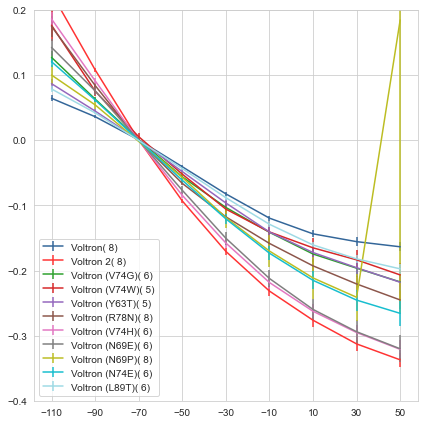

In [114]:
import seaborn as sns

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.set_style(style='whitegrid')
# import matplotlib.font_manager as font_manager

n = len(sensors)
colors = plt.cm.tab20(np.linspace(0,1,n))
c=0


fig = plt.figure(figsize=[6,6])
# ax = fig.add_subplot(111)
ax = plt.subplot(111)
x = np.linspace(-110,50,9)
for sensor in sensors:

    df_sensor = df_p[df_p.Mutation == sensor]
    param_mean = np.mean(df_sensor.dFF.to_list(),axis=0)
    param_sem = np.std(df_sensor.dFF.to_list(),axis=0)/np.sqrt(len(df_sensor))

    param_mean = np.flip(param_mean)
    param_sem = np.flip(param_sem)
    
    if c == 0:
        ax.errorbar(x, param_mean, yerr = param_sem, fmt = '-', color='#336699',
                    label=labels_dict[sensor]+'( %d)' %len(df_sensor))
    elif c == 1:
        ax.errorbar(x, param_mean, yerr = param_sem, fmt = '-', color='#FF3333',
                    label=labels_dict[sensor]+'( %d)' %len(df_sensor))
    else:
        ax.errorbar(x, param_mean, yerr = param_sem, fmt = '-', color=colors[c],
                    label=labels_dict[sensor]+'( %d)' %len(df_sensor))
    c+=1
ax.set_ylim([-0.4,0.2])
plt.setp(ax, xticks=x)
plt.legend()
plt.tight_layout()


In [48]:
a.shape

(49,)

In [99]:
len(sensors)

37